Chapter 14

# PCA
Book_7《机器学习》 | 鸢尾花书

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# Load the iris data
iris_sns = sns.load_dataset("iris")
# A copy from Seaborn
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length','Sepal width',
                 'Petal length','Petal width']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

In [3]:
#%% Heatmap of X


sns.set_style("ticks")

X = X_df.to_numpy();

Text(0.5, 1.0, 'X')

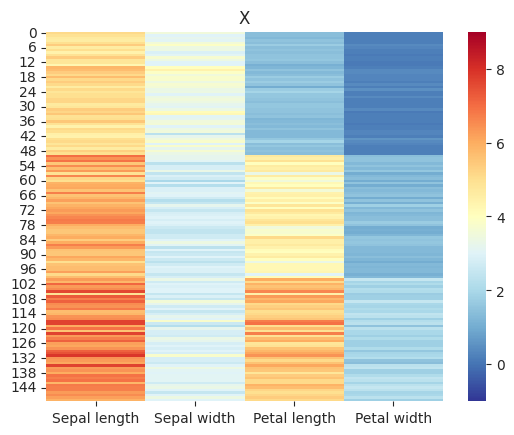

In [4]:
# Visualize the heatmap of X

fig, ax = plt.subplots()
ax = sns.heatmap(X,
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X')

Text(0.5, 1.0, 'Distribution of X columns')

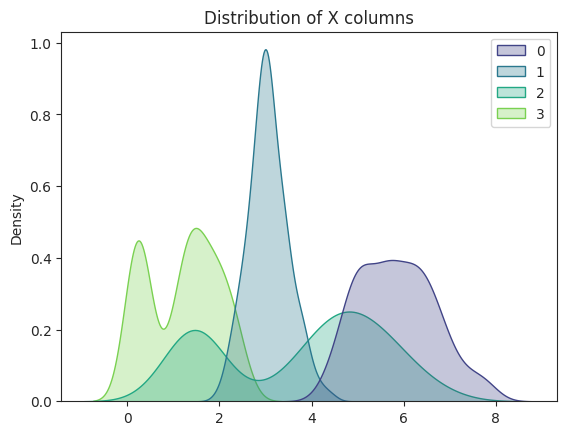

In [ ]:
# distribution of column features of X

fig, ax = plt.subplots()
sns.kdeplot(data=X,fill=True,
            common_norm=False,
            alpha=.3, linewidth=1,
            palette = "viridis")
plt.title('Distribution of X columns')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

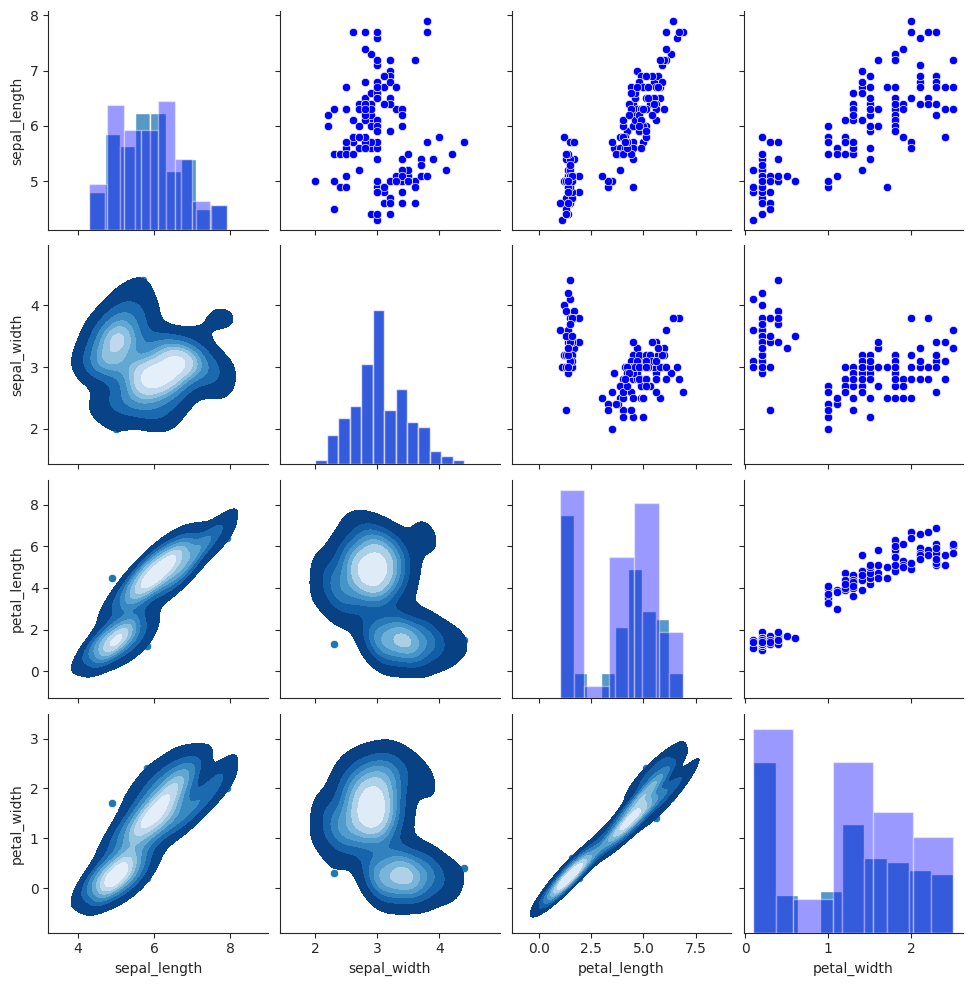

In [5]:
#%% Pairplot of the original data X

# with no class labels
g = sns.pairplot(iris_sns)
g.map_upper(sns.scatterplot, color = 'b')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Blues_r")
g.map_diag(sns.distplot, kde=False, color = 'b')

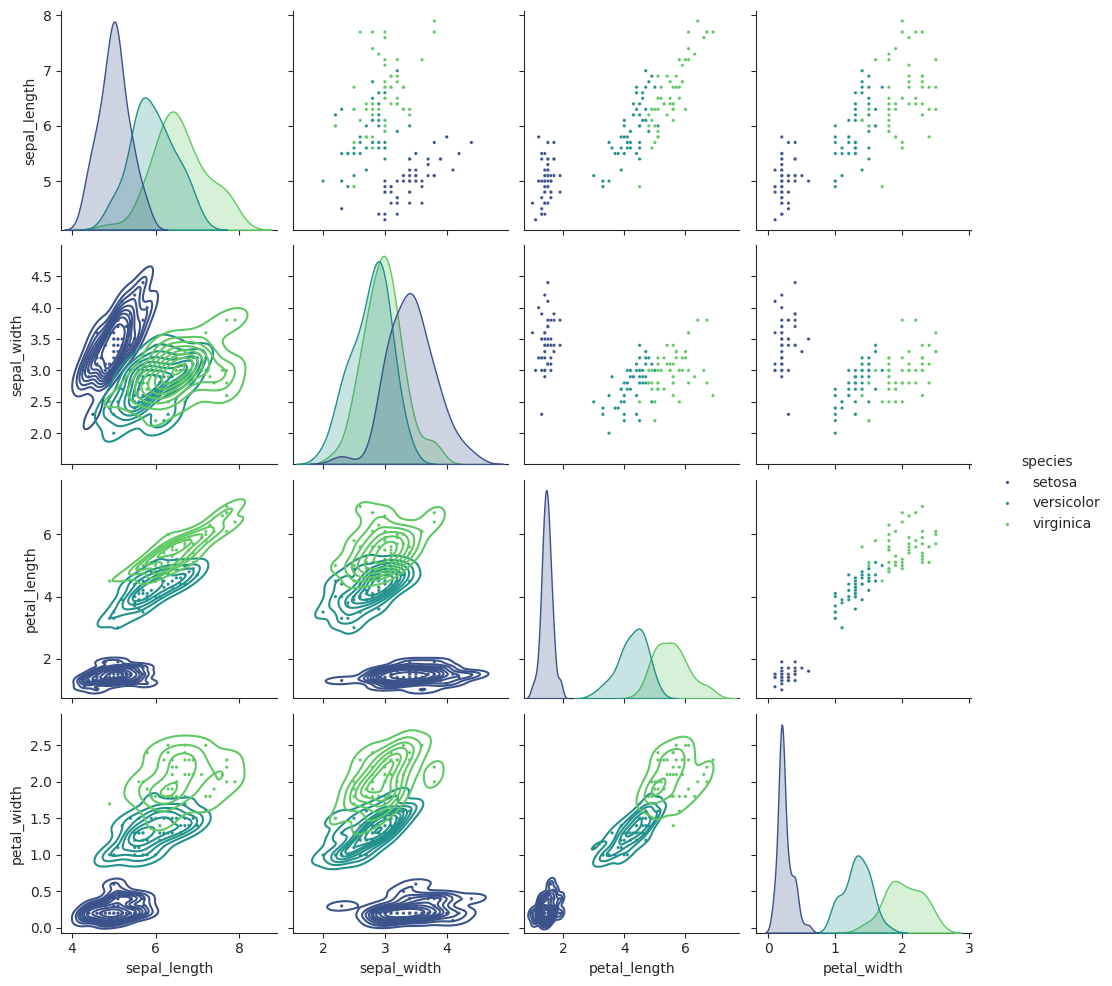

In [6]:
# with class labels
g = sns.pairplot(iris_sns,hue="species", plot_kws={"s": 6}, palette = "viridis")
g.map_lower(sns.kdeplot)

In [ ]:
#%%

#%% PCA

from sklearn.decomposition import PCA

pcamodel = PCA(n_components=4)
pca = pcamodel.fit_transform(X_df)

In [ ]:
#%% Eigen decomposition

X_SIGMA = np.cov(X.T)
X_RHO   = np.corrcoef(X.T)

Lambda,V_eigen = np.linalg.eig(X_SIGMA)

# V_eigen@np.diag(Lambda)@(V_eigen.T)
# np.savetxt('X_SIGMA.csv', X_SIGMA, delimiter=',')

X_sigma = np.std (X, axis=0)
X_VAR   = np.var (X, axis=0)
X_mu    = np.mean(X, axis=0)

In [ ]:
#%% SVD decomposition

U_SVD, S_SVD, V_T_SVD = np.linalg.svd(X,full_matrices = False)

Text(0.5, 1.0, 'V transpose')

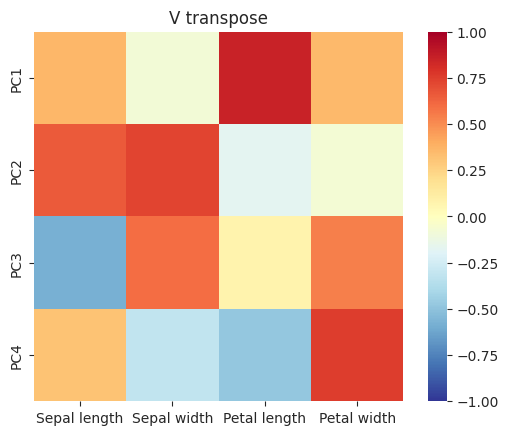

In [ ]:
#%% Heatmap of V transpose

fig, ax = plt.subplots()
ax = sns.heatmap(pcamodel.components_,
                 cmap='RdYlBu_r',
                 yticklabels=['PC1','PC2','PC3','PC4'],
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=1)
ax.set_aspect("equal")
plt.title('V transpose')

In [ ]:
#%% Heatmap of V

V = pcamodel.components_.transpose()

Text(0.5, 1.0, 'V')

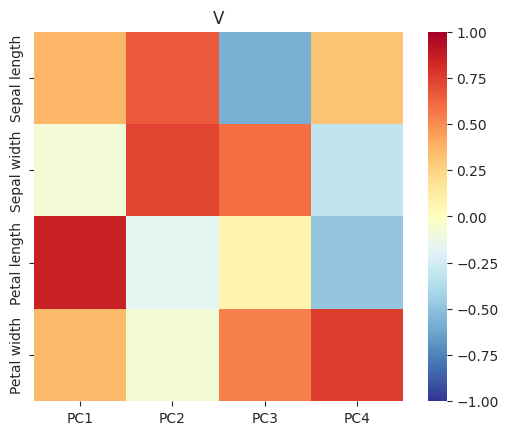

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(V,
                 cmap='RdYlBu_r',
                 xticklabels=['PC1','PC2','PC3','PC4'],
                 yticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=1)
ax.set_aspect("equal")
plt.title('V')

In [ ]:
# Convert V array to dataframe
V_df = pd.DataFrame(data=V,
                    columns = ['PC1','PC2','PC3','PC4'],
                    index   = ['Sepal length','Sepal width',
                               'Petal length','Petal width'])

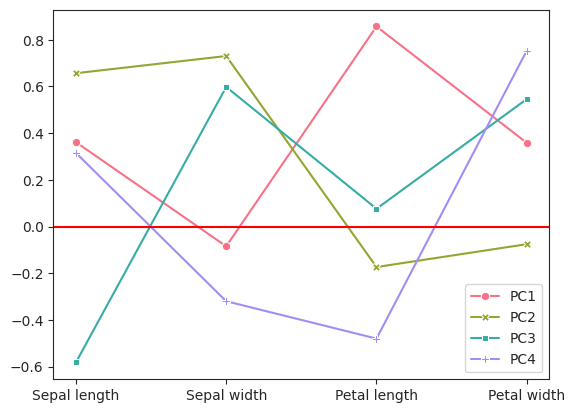

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=V_df,markers=True, dashes=False,palette = "husl")
plt.axhline(y=0, color='r', linestyle='-')

Text(0.5, 1.0, 'V.T @ V = I')

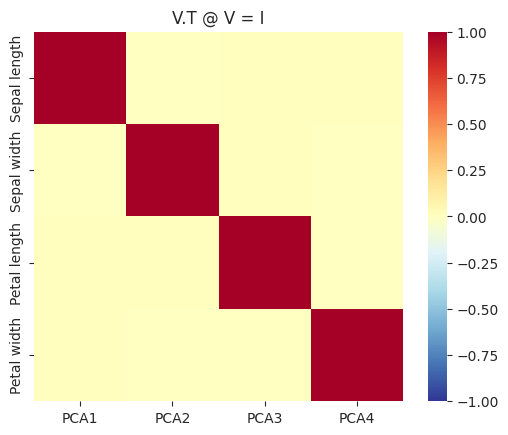

In [ ]:
#%% V.T @ V = I

fig, ax = plt.subplots()
ax = sns.heatmap((V.T)@V,
                 cmap='RdYlBu_r',
                 xticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 yticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=1)
ax.set_aspect("equal")
plt.title('V.T @ V = I')

In [ ]:
#%%

#%% Heatmap of Z

# Project original data X to Z
Z = X@V

Text(0.5, 1.0, 'Z')

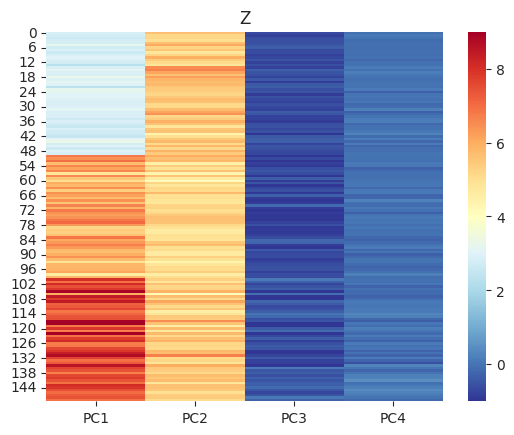

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(Z,
                 cmap='RdYlBu_r',
                 xticklabels=['PC1','PC2','PC3','PC4'],
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('Z')

Text(0.5, 1.0, 'Distribution of Z columns')

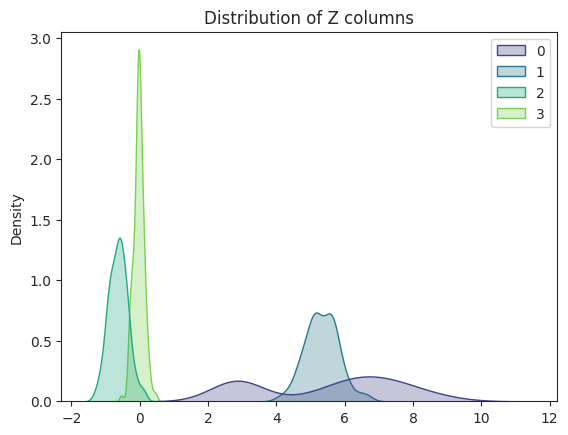

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data=Z,fill=True,
            common_norm=False,
            alpha=.3, linewidth=1,
            palette = "viridis")
plt.title('Distribution of Z columns')

In [ ]:
# Calculate statistics of Z

Z_SIGMA = np.cov(Z.T)
Z_RHO   = np.corrcoef(Z.T)

Z_sigma = np.std (Z, axis=0)
Z_VAR   = np.var (Z, axis=0)
Z_mu    = np.mean(Z, axis=0)

#%% heatmap of covariance and correlation matrices

Text(0.5, 1.0, 'Covariance matrix of Z')

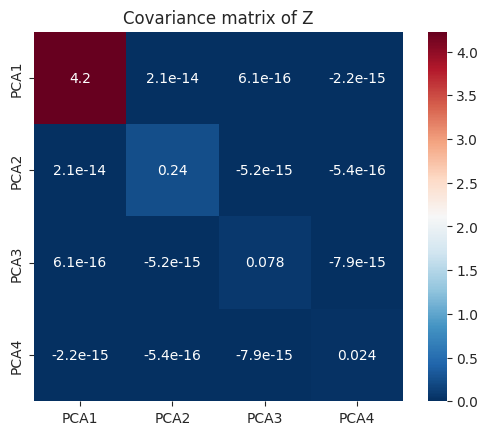

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(Z_SIGMA,
                 cmap='RdBu_r',
                 xticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 cbar_kws={"orientation": "vertical"},
                 annot = True)

ax.set_aspect("equal")
ax.set_title("Covariance matrix of Z")

Text(0.5, 1.0, 'Correlation matrix of Z')

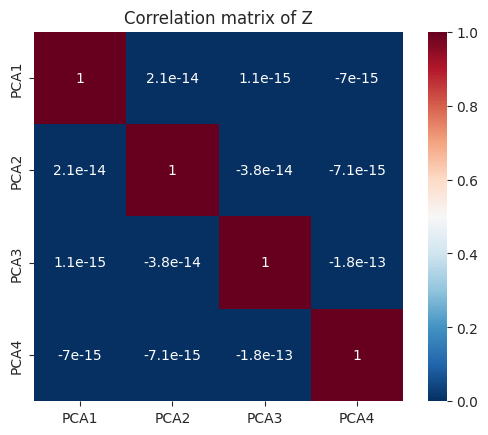

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(Z_RHO,
                 cmap='RdBu_r',
                 xticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 cbar_kws={"orientation": "vertical"},annot = True)

ax.set_aspect("equal")
ax.set_title("Correlation matrix of Z")

In [ ]:
#%% Pairplot of the original data Z


PCA_df = pd.DataFrame(data=pca, columns=["PC1", "PC2","PC3", "PC4"])
PCA_df['species'] = iris_sns['species']

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=colo

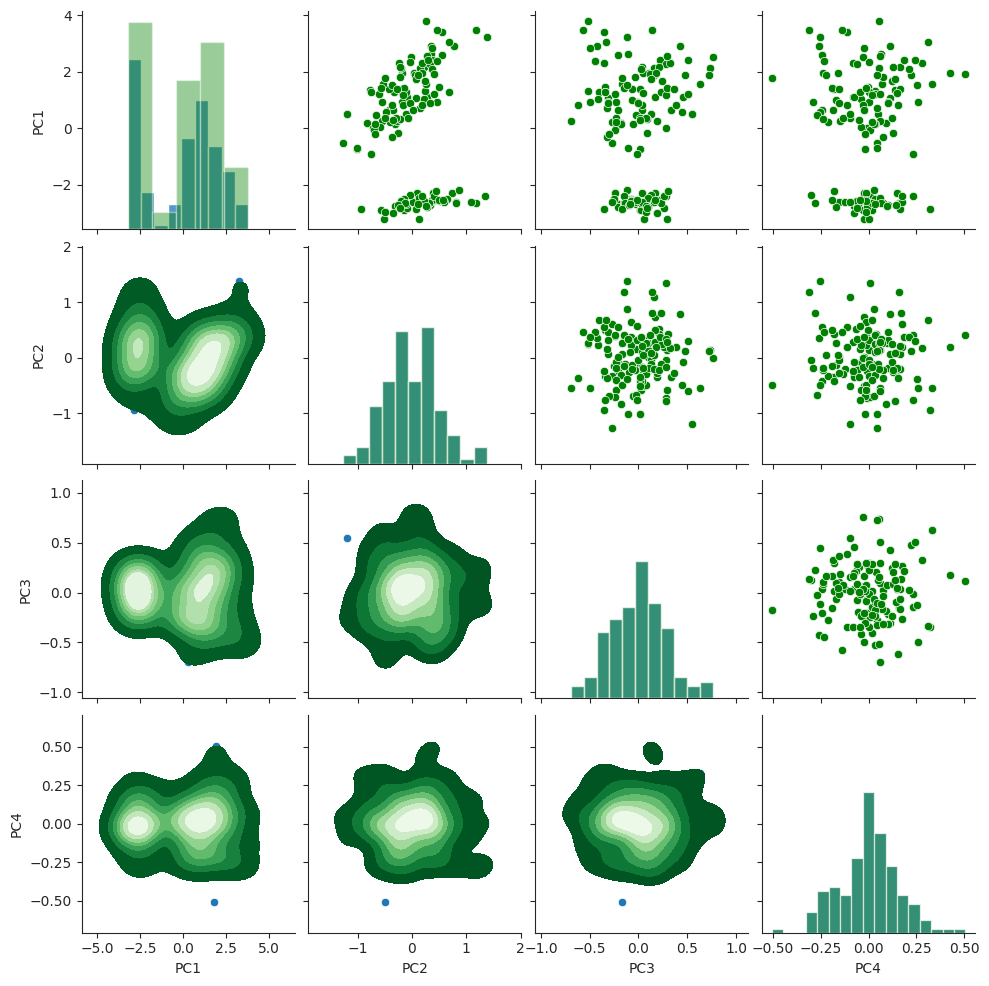

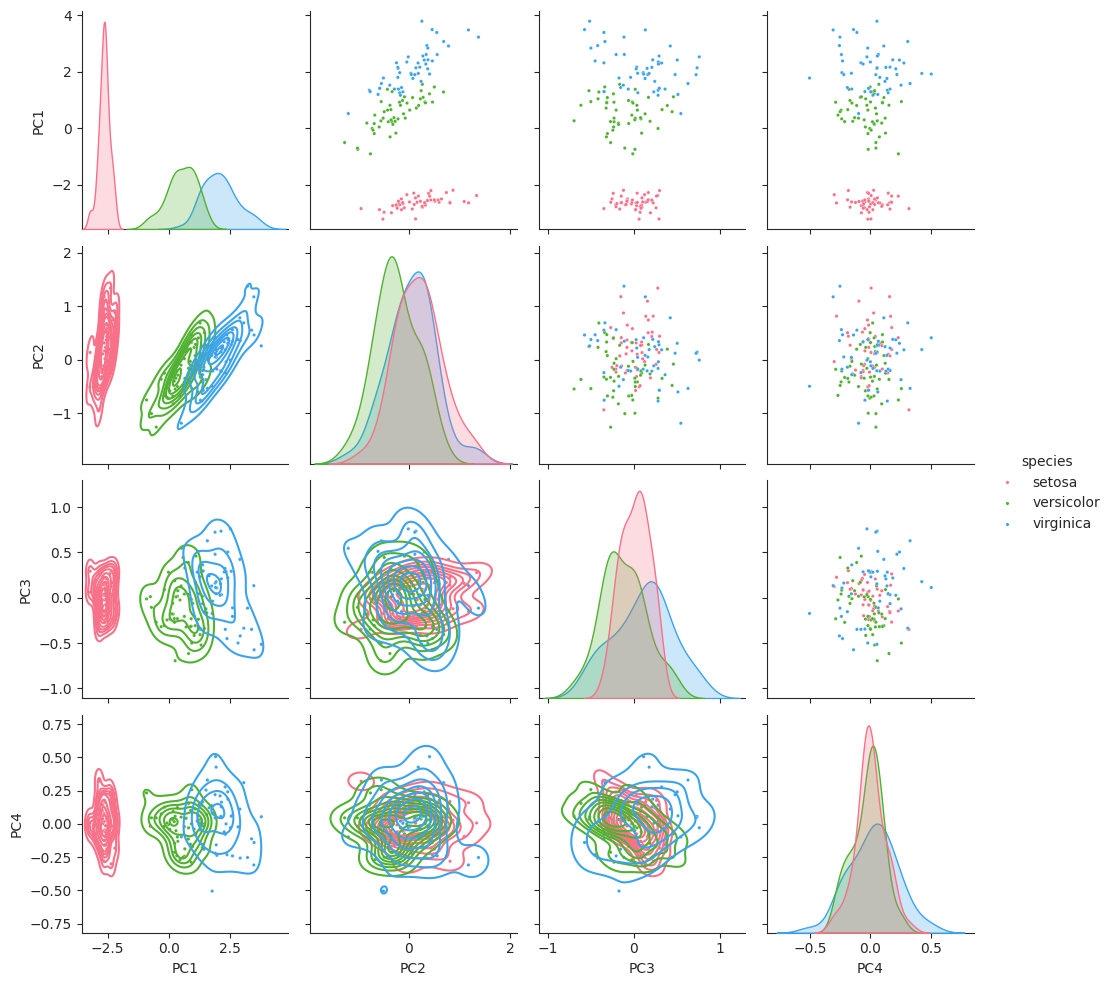

In [ ]:
# with no class labels

g = sns.pairplot(PCA_df)
g.map_upper(sns.scatterplot, color = 'g')
g.map_lower(sns.kdeplot, levels=8, fill=True, cmap="Greens_r")
g.map_diag(sns.distplot, kde=False, color = 'g')

# with class labels

g = sns.pairplot(PCA_df,hue="species", plot_kws={"s": 6},palette = "husl")
g.map_lower(sns.kdeplot)

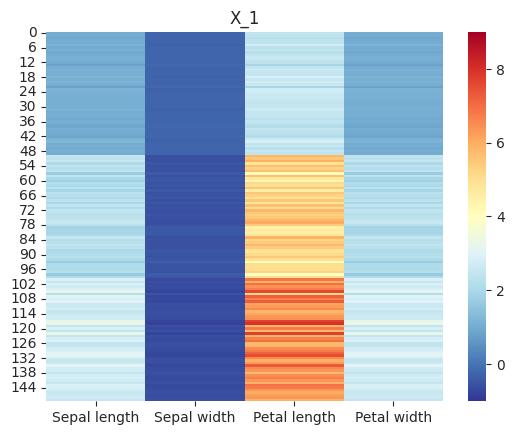

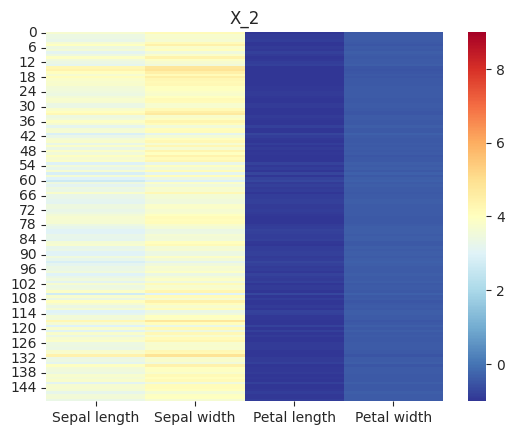

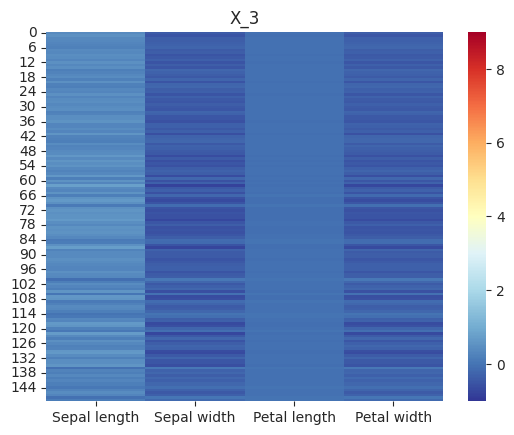

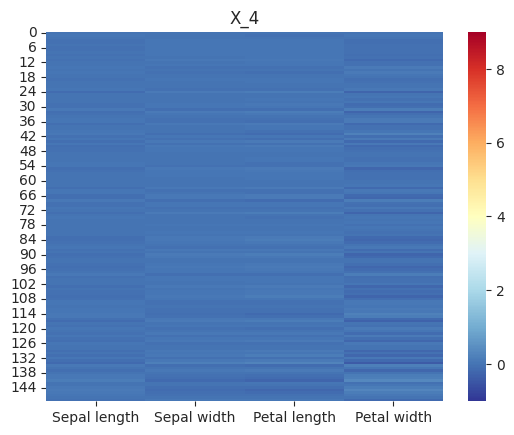

In [ ]:
#%%
#%% Heatmap of X1~X4

X_re = np.zeros_like(X);
# Reproduce original data X

for i in range(4):

    z_i = np.array([Z[:,i]]).T
    v_i = np.array([V[:,i]]).T

    X_i = z_i@(v_i.transpose())
    X_re = X_re + X_i;
    fig, ax = plt.subplots()
    ax = sns.heatmap(X_i,
                     cmap='RdYlBu_r',
                     xticklabels=list(X_df.columns),
                     cbar_kws={"orientation": "vertical"},
                     vmin=-1, vmax=9)
    # # ax.set_aspect("equal")
    plt.title('X_' + str(i+1))

Text(0.5, 1.0, 'X reproduced')

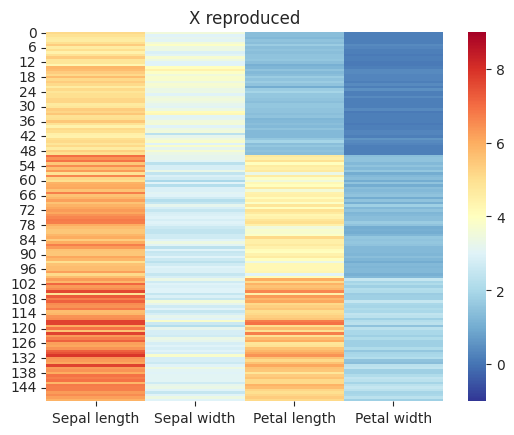

In [ ]:
#%% X1 + X2 + X3 + X4 to reproduce X

fig, ax = plt.subplots()
ax = sns.heatmap(X_re,
                 cmap='RdYlBu_r',
                 xticklabels=list(X_df.columns),
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X reproduced')
# Visualize reproduced X

In [ ]:
#%% X1 + X2 to approximate the original data

z_12 = Z[:,0:2]
v_12 = V[:,0:2]

X_12 = z_12@(v_12.transpose())

Text(0.5, 1.0, 'X1 + X2')

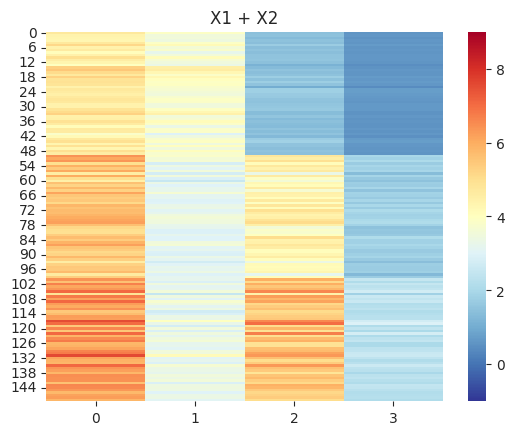

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(X_12,
                 cmap='RdYlBu_r',
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('X1 + X2')

Text(0.5, 1.0, 'Error, E')

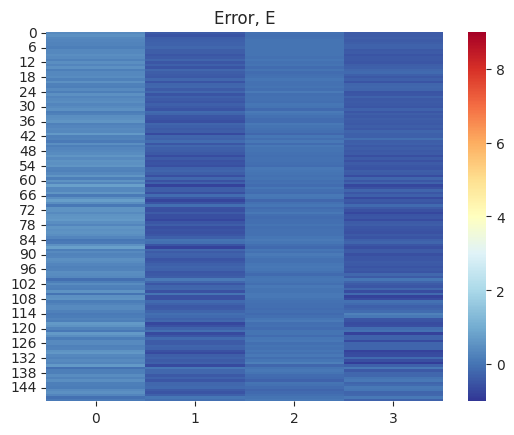

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(X - X_12,
                 cmap='RdYlBu_r',
                 cbar_kws={"orientation": "vertical"},
                 vmin=-1, vmax=9)
plt.title('Error, E')

In [ ]:
#%% biplot

In [ ]:
! pip install yellowbrick

In [ ]:
from yellowbrick.features import PCA
from yellowbrick.style import set_palette
set_palette('pastel')

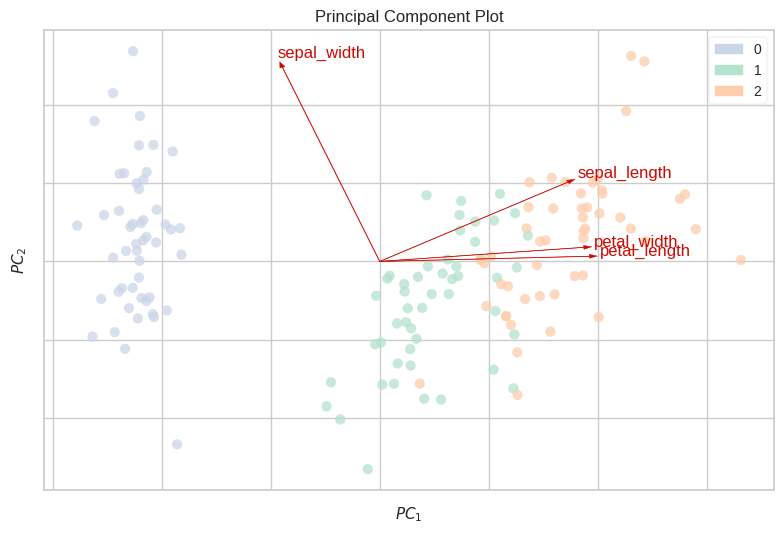

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
fig, ax = plt.subplots()
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(iris_sns[[
    'sepal_length', 'sepal_width',
    'petal_length','petal_width']], y)

visualizer.show()

/usr/local/lib/python3.11/dist-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self.fig.tight_layout()


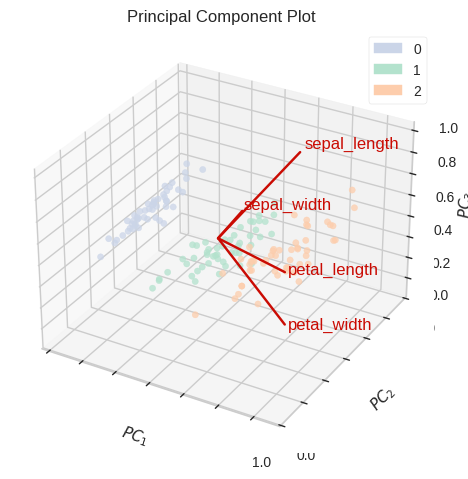

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
visualizer = PCA(scale=True, proj_features=True,projection = 3)
visualizer.fit_transform(iris_sns[[
    'sepal_length', 'sepal_width',
    'petal_length','petal_width']], y)

visualizer.show()

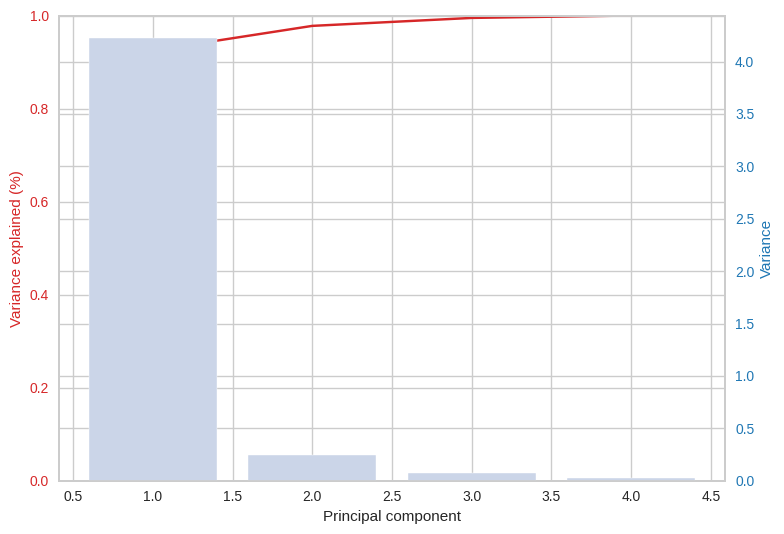

In [ ]:
#%%

#%% Scree plot

# pcamodel.explained_variance_
# pcamodel.explained_variance_ratio_

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Principal component')
ax1.set_ylabel('Variance explained (%)', color=color)
plt.plot(range(1,len(pcamodel.explained_variance_ratio_ )+1),
         np.cumsum(pcamodel.explained_variance_ratio_,),
         color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,1])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Variance', color=color)
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )

ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
# plt.show()


#%%